# 1. Instalacao e importacao das bibliotecas

In [222]:
!pip install category_encoders

In [223]:
!pip install lightgbm

In [224]:
#Tratamento de dados

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Processamento

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression

#Modelagem

import lightgbm as lgb




In [225]:
import warnings

warnings.filterwarnings('ignore')


# 2. Carregando e tratando os dados

In [226]:
df = pd.read_csv('preco_carros.csv', sep = ',')

In [227]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [228]:
df.shape

(205, 26)

In [229]:
df = df.drop(columns = ['car_ID','symboling'])

In [230]:
colunas_traduzidas = {
    'CarName': 'Nome_do_Carro',
    'fueltype': 'tipo_de_combustível',
    'aspiration': 'aspiração',
    'doornumber': 'número_de_portas',
    'carbody': 'tipo_de_carroceria',
    'drivewheel': 'rodas_motrizes',
    'enginelocation': 'localização_do_motor',
    'wheelbase': 'distância_entre_eixos',
    'carlength': 'comprimento_do_carro',
    'carwidth': 'largura_do_carro',
    'carheight': 'altura_do_carro',
    'curbweight': 'peso_em_ordem_de_marcha',
    'enginetype': 'tipo_de_motor',
    'cylindernumber': 'número_de_cilindros',
    'enginesize': 'tamanho_do_motor',
    'fuelsystem': 'sistema_de_combustível',
    'boreratio': 'diâmetro_do_cilindro',
    'stroke': 'curso_do_pistão',
    'compressionratio': 'taxa_de_compressão',
    'horsepower': 'potência',
    'peakrpm': 'rpm_máximo',
    'citympg': 'consumo_urbano',
    'highwaympg': 'consumo_rodoviário',
    'price': 'preço'
}

In [231]:
df.rename(columns = colunas_traduzidas, inplace = True)

In [232]:
valores_nulos = df.isnull().sum()
valores_nulos

Nome_do_Carro              0
tipo_de_combustível        0
aspiração                  0
número_de_portas           0
tipo_de_carroceria         0
rodas_motrizes             0
localização_do_motor       0
distância_entre_eixos      0
comprimento_do_carro       0
largura_do_carro           0
altura_do_carro            0
peso_em_ordem_de_marcha    0
tipo_de_motor              0
número_de_cilindros        0
tamanho_do_motor           0
sistema_de_combustível     0
diâmetro_do_cilindro       0
curso_do_pistão            0
taxa_de_compressão         0
potência                   0
rpm_máximo                 0
consumo_urbano             0
consumo_rodoviário         0
preço                      0
dtype: int64

In [233]:
df['Nome_do_Carro'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [234]:
df[['Marca','Nome_carro']] = df['Nome_do_Carro'].str.split(' ',expand=True, n = 1) #Separando o nome da marca do nome do carro
df = df.drop(columns = ['Nome_do_Carro'])

In [235]:
df['Marca'].unique() #Verificando nome das marcas

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [236]:

df['Marca'] = df['Marca'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'}) # Renomeando marcas que tinham os nomes escritos incorretos e fora do padrão


In [237]:
df['Marca'].unique() 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# 3. Analise exploratoria de dados (EDA)

In [238]:
df.nunique().sort_values(ascending = False) #Quantidade de valores unicos em cada coluna

preço                      189
peso_em_ordem_de_marcha    171
Nome_carro                 141
comprimento_do_carro        75
potência                    59
distância_entre_eixos       53
altura_do_carro             49
tamanho_do_motor            44
largura_do_carro            44
diâmetro_do_cilindro        38
curso_do_pistão             37
taxa_de_compressão          32
consumo_rodoviário          30
consumo_urbano              29
rpm_máximo                  23
Marca                       22
sistema_de_combustível       8
número_de_cilindros          7
tipo_de_motor                7
tipo_de_carroceria           5
rodas_motrizes               3
aspiração                    2
localização_do_motor         2
número_de_portas             2
tipo_de_combustível          2
dtype: int64

In [239]:
df.describe()

,distância_entre_eixos,comprimento_do_carro,largura_do_carro,altura_do_carro,peso_em_ordem_de_marcha,tamanho_do_motor,diâmetro_do_cilindro,curso_do_pistão,taxa_de_compressão,potência,rpm_máximo,consumo_urbano,consumo_rodoviário,preço
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Axes: title={'center': 'DISTRIBUICAO DOS PRECOS'}, xlabel='PRECOS', ylabel='QUANTIDADE'>

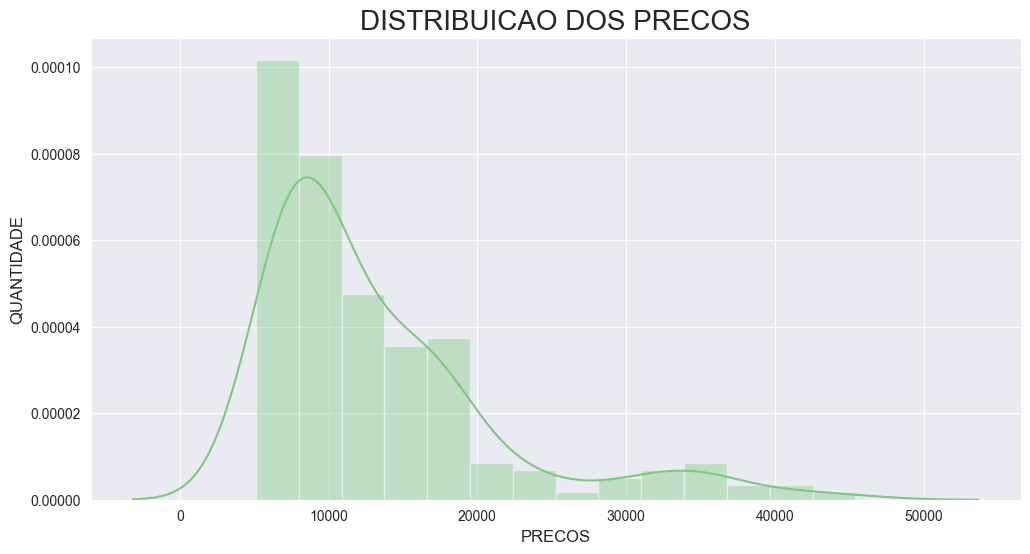

In [240]:
ax = sns.distplot(df['preço'])
ax.figure.set_size_inches(12, 6)
ax.set_title('DISTRIBUICAO DOS PRECOS', fontsize = 20)
ax.set_xlabel('PRECOS', fontsize = 12)
sns.set_palette("viridis")
sns.set_style("darkgrid")
ax

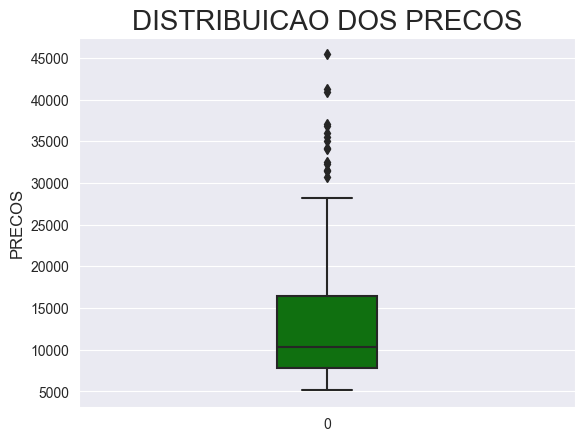

In [241]:
ax = sns.boxplot(data = df['preço'],orient = 'v',width=0.2, color = 'Green')
ax.set_title('DISTRIBUICAO DOS PRECOS', fontsize = 20)
ax.set_ylabel('PRECOS', fontsize = 12)
sns.set_palette("viridis")
sns.set_style("darkgrid")
ax
plt.savefig('distribuicao_precos.png')

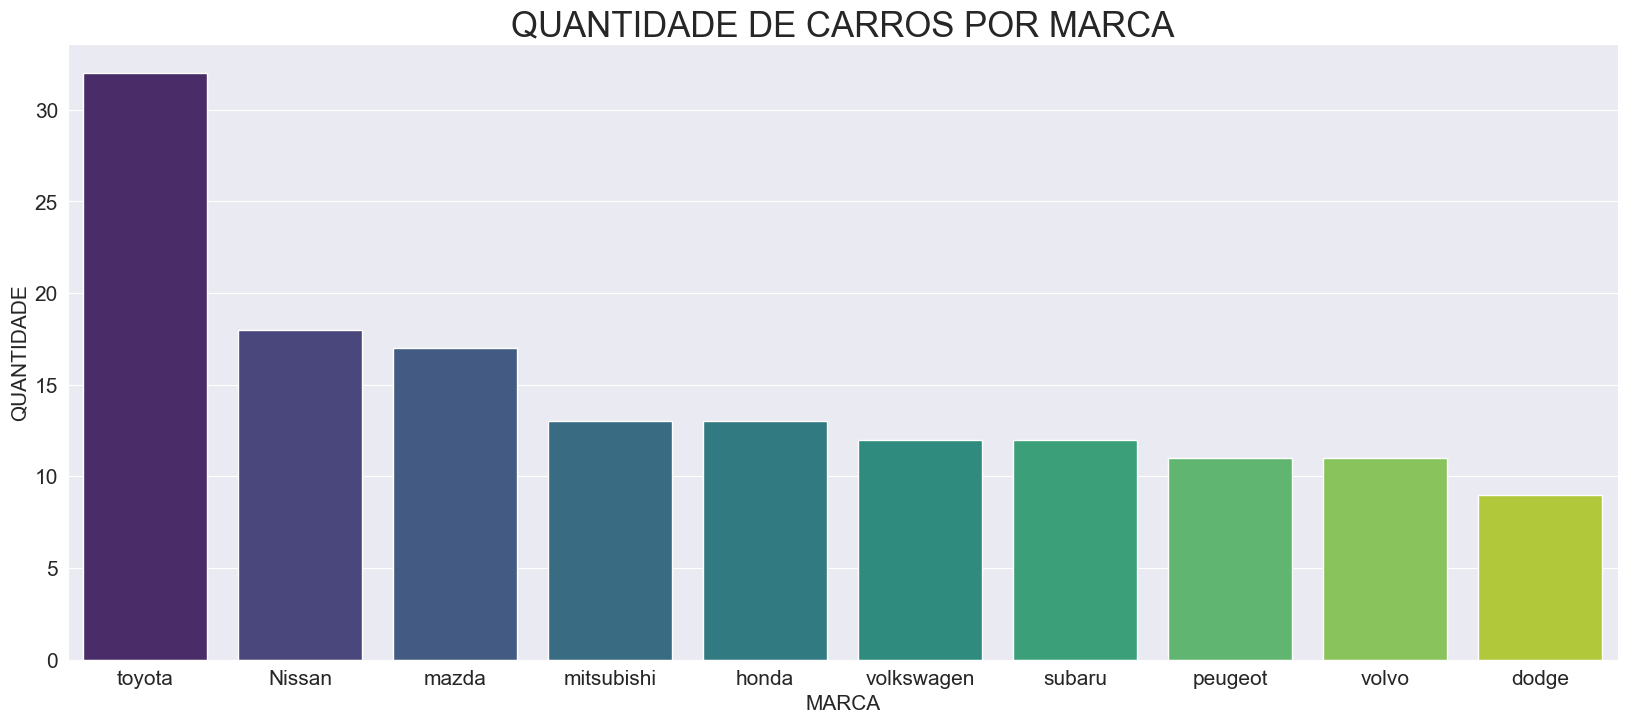

In [242]:
quantidade_por_marca = df['Marca'].value_counts().sort_values(ascending = False)
quantidade_por_marca = pd.DataFrame(quantidade_por_marca).reset_index().head(10)
ax = sns.barplot(data = quantidade_por_marca, x = 'Marca', y = 'count', palette= 'viridis')
ax.figure.set_size_inches(20, 8)
ax.set_title('QUANTIDADE DE CARROS POR MARCA', fontsize = 25)
ax.set_ylabel('QUANTIDADE', fontsize = 15)
ax.set_xlabel('MARCA', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.set_palette("Accent")
sns.set_style("darkgrid")
plt.savefig('qtd_por_marca_top_10.png')

In [243]:
quantidade_por_marca.rename(columns = {'count': 'Quantidade'}, inplace = True)
quantidade_por_marca

,Marca,Quantidade
0,toyota,32
1,Nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13
5,volkswagen,12
6,subaru,12
7,peugeot,11
8,volvo,11
9,dodge,9


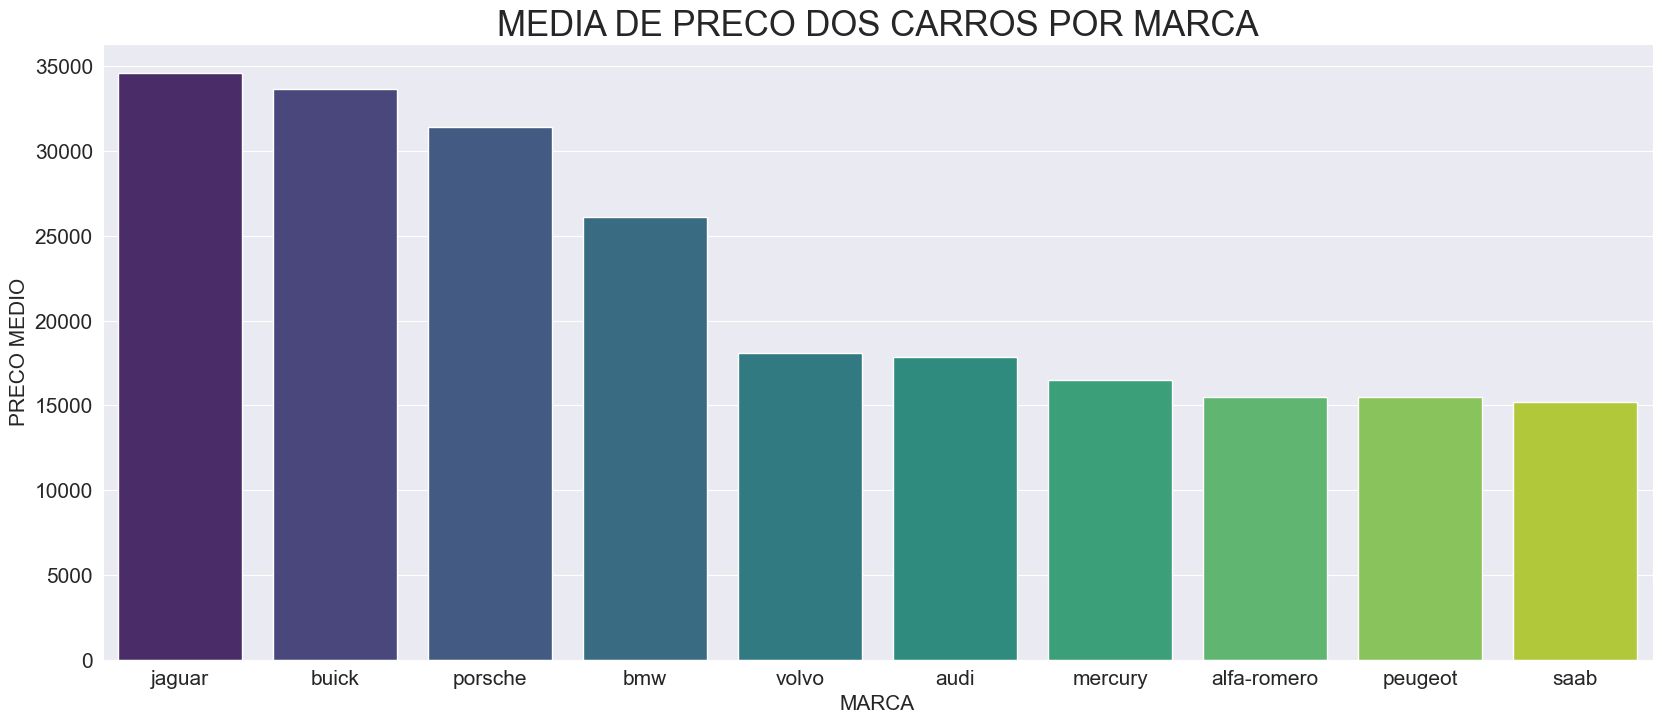

In [244]:
preco_medio_por_marca = df.groupby('Marca')['preço'].mean()
preco_medio_por_marca = pd.DataFrame(preco_medio_por_marca).reset_index().sort_values(by = 'preço', ascending = False).head(10)
ax = sns.barplot(data = preco_medio_por_marca, x = 'Marca', y = 'preço', palette= 'viridis')
ax.figure.set_size_inches(20, 8)
ax.set_title('MEDIA DE PRECO DOS CARROS POR MARCA', fontsize = 25)
ax.set_ylabel('PRECO MEDIO', fontsize = 15)
ax.set_xlabel('MARCA', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.set_palette("Accent")
sns.set_style("darkgrid")
plt.savefig('media_preco_marca_top_10.png')

In [245]:
preco_medio_por_marca

,Marca,preço
9,jaguar,34600.000000
4,buick,33647.000000
15,porsche,31400.500000
3,bmw,26118.750000
21,volvo,18063.181818
2,audi,17859.166714
11,mercury,16503.000000
1,alfa-romero,15498.333333
13,peugeot,15489.090909
17,saab,15223.333333


# 4. Analisando o comportamento do target em relacao as features

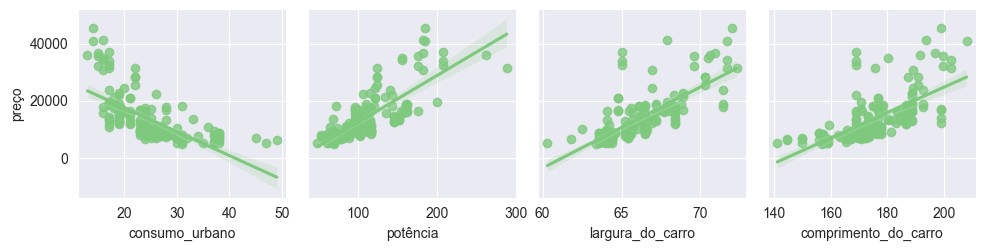

In [246]:
#Analisando o comportamento do preço em relação a outras variaveis

ax = sns.pairplot(df, y_vars='preço', x_vars=['consumo_urbano', 'potência', 'largura_do_carro', 'comprimento_do_carro'], kind= 'reg')
plt.savefig('comportamento.png')

<Axes: title={'center': 'PRECOS EM FUNCAO DO TIPO DE COMBUSTIVEL '}, xlabel='TIPO COMBUSTIVEL', ylabel='PREÇO'>

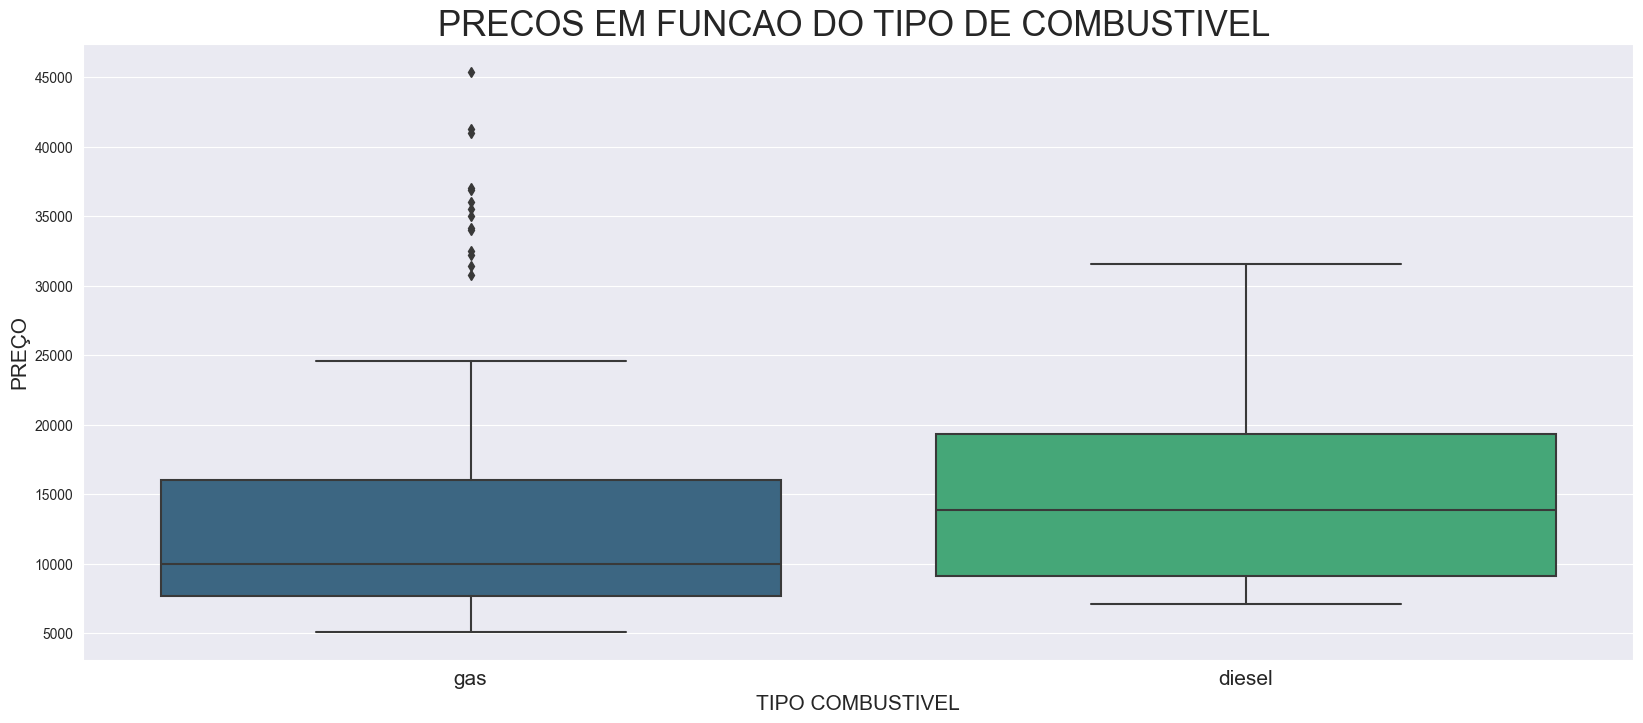

In [247]:
## Analisando o preco em relação ao tipo de combustivel


ax = sns.boxplot( x = 'tipo_de_combustível', y = 'preço', data = df, palette= 'viridis')
ax.figure.set_size_inches(20, 8)
ax.set_title('PRECOS EM FUNCAO DO TIPO DE COMBUSTIVEL ', fontsize = 25)
ax.set_ylabel('PREÇO', fontsize = 15)
ax.set_xlabel('TIPO COMBUSTIVEL', fontsize = 15)
plt.xticks(fontsize=15)
sns.set_palette("Accent")
sns.set_style("darkgrid")
ax

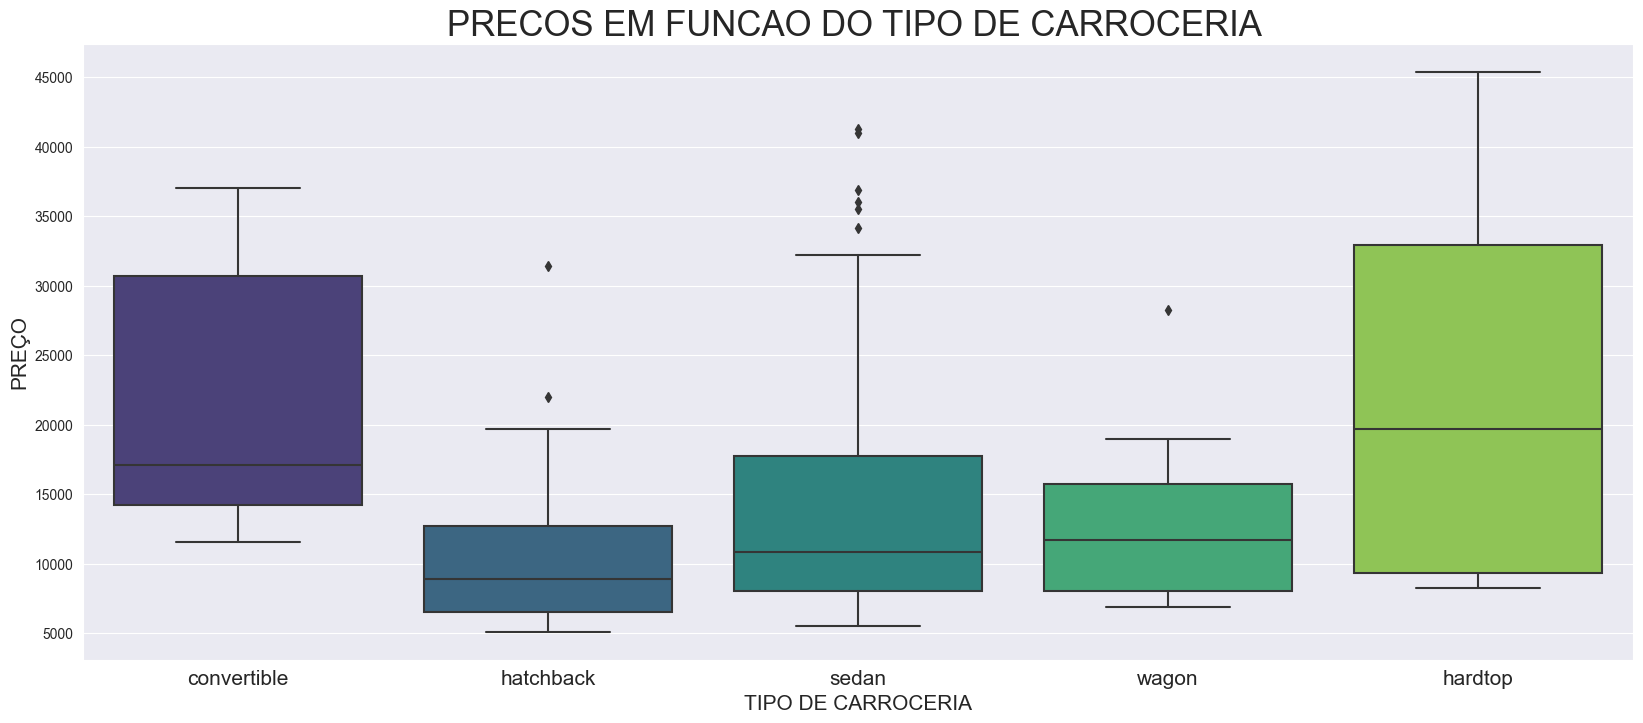

In [248]:
## Analisando o preco em relacao ao tipo de carroceria


ax = sns.boxplot( x = 'tipo_de_carroceria', y = 'preço', data = df, palette= 'viridis')
ax.figure.set_size_inches(20, 8)
ax.set_title('PRECOS EM FUNCAO DO TIPO DE CARROCERIA ', fontsize = 25)
ax.set_ylabel('PREÇO', fontsize = 15)
ax.set_xlabel('TIPO DE CARROCERIA', fontsize = 15)
plt.xticks(fontsize=15)
sns.set_palette("Accent")
sns.set_style("darkgrid")
ax
plt.savefig('comportamento_carroceria.png')

<Axes: title={'center': 'PRECOS EM FUNCAO DO TIPO DE COMBUSTIVEL CONFORME CARROCERIA'}, xlabel='TIPO COMBUSTIVEL', ylabel='PREÇO'>

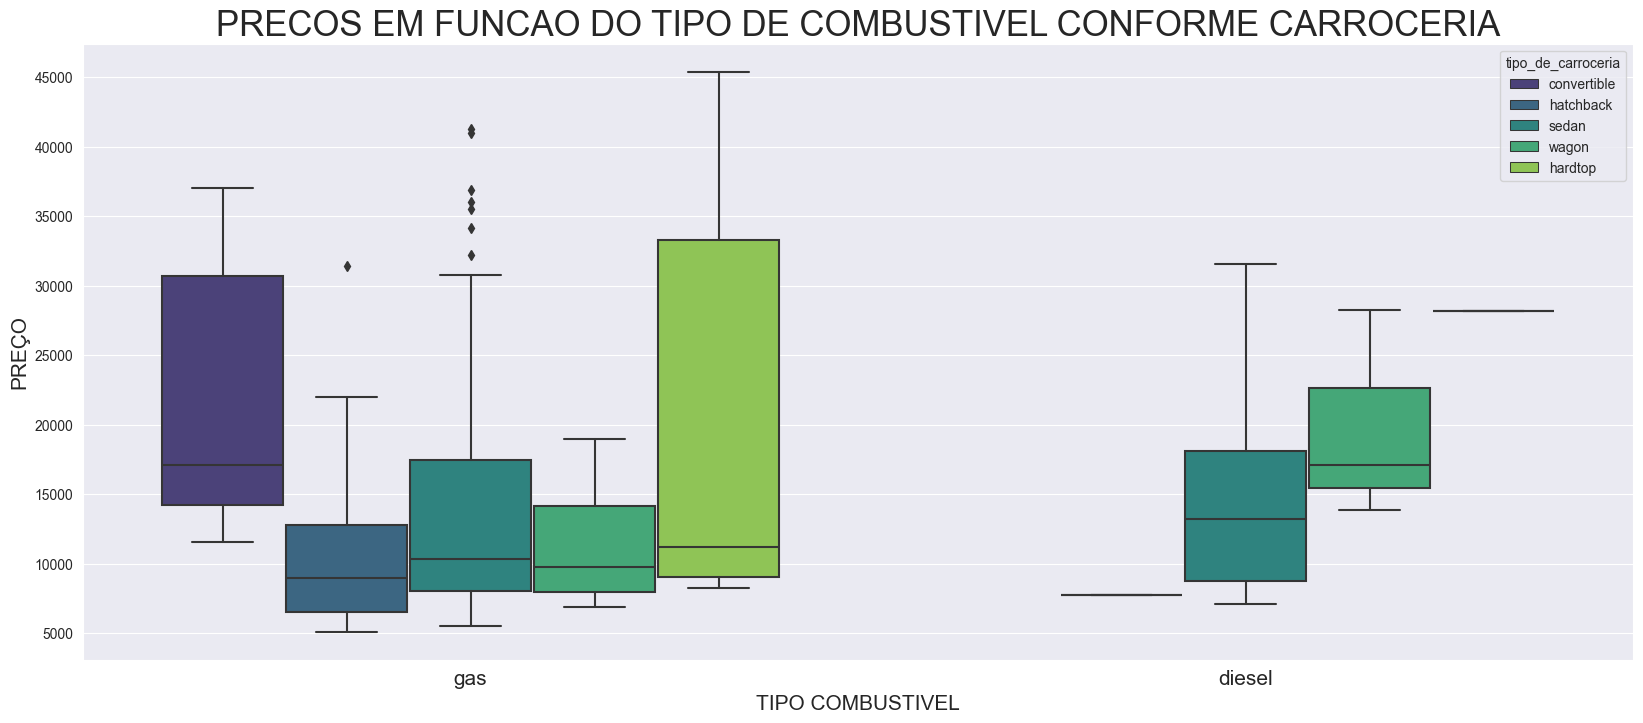

In [249]:
## Analisando o preco em funcao do tipo de combustivel e carroceria


ax = sns.boxplot( x = 'tipo_de_combustível', y = 'preço', hue = 'tipo_de_carroceria', data = df, palette= 'viridis')
ax.figure.set_size_inches(20, 8)
ax.set_title('PRECOS EM FUNCAO DO TIPO DE COMBUSTIVEL CONFORME CARROCERIA', fontsize = 25)
ax.set_ylabel('PREÇO', fontsize = 15)
ax.set_xlabel('TIPO COMBUSTIVEL', fontsize = 15)
plt.xticks(fontsize=15)
sns.set_palette("Accent")
sns.set_style("darkgrid")
ax

In [250]:
df.drop(columns = ['Nome_carro','aspiração','rodas_motrizes','localização_do_motor','sistema_de_combustível'], inplace = True)

In [251]:
#Separação das colunas numéricas e categoricas
col_cat = df.select_dtypes(include=['object']).columns.to_list()
col_num = df.select_dtypes(exclude=['object']).columns.to_list()

In [252]:
#Definindo o target e retirando ele das colunas numéricas
col_num = [col for col in col_num if col != 'preço']
target = 'preço'

In [253]:
df[col_num].head()

,distância_entre_eixos,comprimento_do_carro,largura_do_carro,altura_do_carro,peso_em_ordem_de_marcha,tamanho_do_motor,diâmetro_do_cilindro,curso_do_pistão,taxa_de_compressão,potência,rpm_máximo,consumo_urbano,consumo_rodoviário
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [254]:
df[col_cat].head()

,tipo_de_combustível,número_de_portas,tipo_de_carroceria,tipo_de_motor,número_de_cilindros,Marca
0,gas,two,convertible,dohc,four,alfa-romero
1,gas,two,convertible,dohc,four,alfa-romero
2,gas,two,hatchback,ohcv,six,alfa-romero
3,gas,four,sedan,ohc,four,audi
4,gas,four,sedan,ohc,five,audi


In [255]:
df[col_cat].nunique()

tipo_de_combustível     2
número_de_portas        2
tipo_de_carroceria      5
tipo_de_motor           7
número_de_cilindros     7
Marca                  22
dtype: int64

# 5. Machine Learning

In [256]:
#Definindo X e y para a divisão de treino e teste
X = df[col_num + col_cat]
y = df[target]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [258]:
print(f'Tamnho do X train e {X_train.shape}')
print(f'Tamnho do X teste e {X_test.shape}')
print(f'Tamnho do y train e {y_train.shape}')
print(f'Tamnho do y teste e {y_test.shape}')

Tamnho do X train e (143, 19)
Tamnho do X teste e (62, 19)
Tamnho do y train e (143,)
Tamnho do y teste e (62,)


## 5.1 LGBMRegressor

In [259]:
lgb_model = lgb.LGBMRegressor()

numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'median')), ('scaler', StandardScaler())]) 
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer,col_num), 
    ('cat', categorical_transformer,col_cat)
])

pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_selection', SelectKBest(score_func = f_regression, k = 10)),
    ('model', lgb_model)
])

pipeline.fit(X_train, y_train)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 143, number of used features: 10
[LightGBM] [Info] Start training from score 13408.503497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distância_entre_eixos',
                                                   'comprimento_do_carro',
                                                   'largura_do_carro',
                                                   'altura_do_carro',
                                                   'peso_em_ordem_de_marcha',
                                                   'tamanho_do_motor',
                                                   'diâmetro_do_cilindro',
                                                   'curso_do_pistão',
                                                   'taxa_de_compress...
                                                   'consumo_urbano',
                                                   'consumo_rodoviário']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['tipo_de_combustível',
                                                   'número_de_portas',
                                                   'tipo_de_carroceria',
                                                   'tipo_de_motor',
                                                   'número_de_cilindros',
                                                   'Marca'])])),
                ('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x0000023284C4B7E0>)),
                ('model', LGBMRegressor())])

In [260]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error


y_pred = pipeline.predict(X_test)



# Calcular MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

#Calcular MAPE

mape = mean_absolute_percentage_error(y_test, y_pred)

# Printar os valores
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}.')
print(f'MSE: {mse:.4f}')
print(f'MAPE: {mape:.4f}')

RMSE: 3378.7426
R²: 0.8352
MAE: 2221.6420.
MSE: 11415901.6063
MAPE: 0.1566


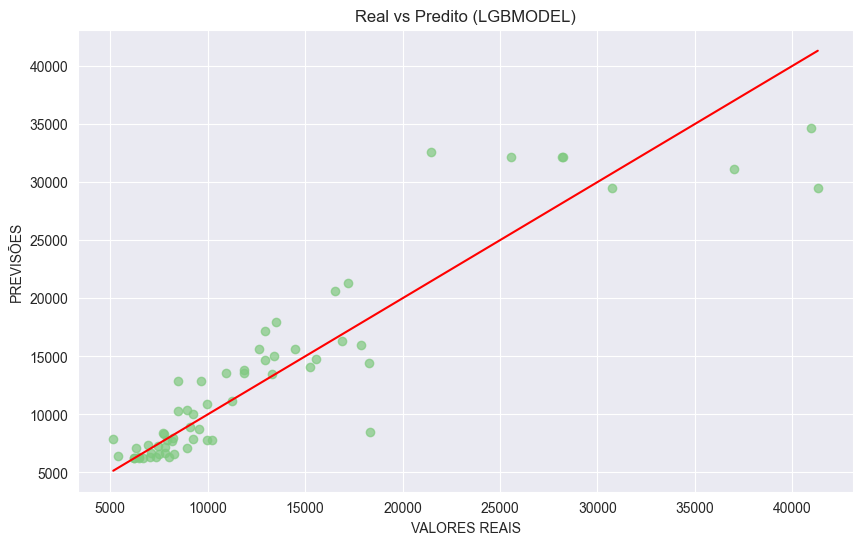

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.xlabel ('VALORES REAIS')
plt.ylabel('PREVISÕES')
plt.title('Real vs Predito (LGBMODEL)')

plt.savefig('comportamento_modelo_LGBMODEL.png')

## 5.2 Random Forest Regressor

In [262]:
from sklearn.ensemble import RandomForestRegressor


# Definindo o modelo RandomForestRegressor com parâmetros específicos
rf_model = RandomForestRegressor(
    n_estimators=15,
    criterion='squared_error',
    random_state=20,
    n_jobs=-1,
    min_samples_leaf = 2
)

# Transformações numéricas e categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder',  OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Pré-processador de colunas
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, col_num),
    ('cat', categorical_transformer, col_cat)
])

# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func = f_regression, k = 10)),
    ('model', rf_model)
])

# Treinando o pipeline com os dados de treino
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distância_entre_eixos',
                                                   'comprimento_do_carro',
                                                   'largura_do_carro',
                                                   'altura_do_carro',
                                                   'peso_em_ordem_de_marcha',
                                                   'tamanho_do_motor',
                                                   'diâmetro_do_cilindro',
                                                   'curso_do_pistão',
                                                   'taxa_de_compress...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['tipo_de_combustível',
                                                   'número_de_portas',
                                                   'tipo_de_carroceria',
                                                   'tipo_de_motor',
                                                   'número_de_cilindros',
                                                   'Marca'])])),
                ('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x0000023284C4B7E0>)),
                ('model',
                 RandomForestRegressor(min_samples_leaf=2, n_estimators=15,
                                       n_jobs=-1, random_state=20))])

In [263]:
y_pred_rf = pipeline.predict(X_test)



# Calcular MSE
mse = mean_squared_error(y_test, y_pred_rf)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular R²
r2 = r2_score(y_test, y_pred_rf)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_rf)

#Calcular MAPE

mape = mean_absolute_percentage_error(y_test, y_pred_rf)

# Printar os valores
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}.')
print(f'MSE: {mse:.4f}')
print(f'MAPE: {mape:.4f}')

RMSE: 2180.4615
R²: 0.9314
MAE: 1480.7826.
MSE: 4754412.1706
MAPE: 0.1097


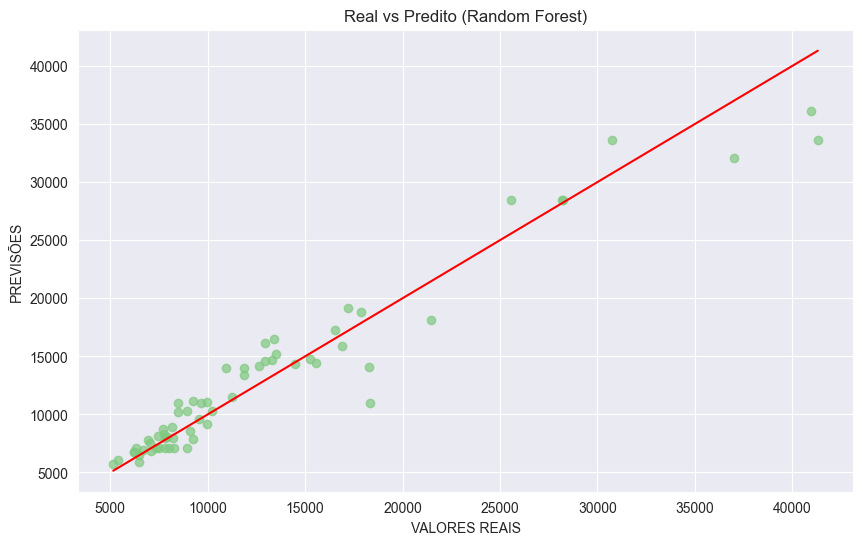

In [264]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.xlabel ('VALORES REAIS')
plt.ylabel('PREVISÕES')
plt.title('Real vs Predito (Random Forest)')
plt.savefig('comportamento_modelo_RANDOM_FOREST.png')